# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

prev_renda = pd.read_csv('previsao_de_renda.csv')
prev_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [2]:
prev_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [3]:
# Separando as variaveis quantitativas
prev_renda_quant = prev_renda[['renda','qt_pessoas_residencia','tempo_emprego','idade','qtd_filhos']]

In [4]:
# Avaliando a correlação das variaveis
correlation_matrix = prev_renda_quant.corr()
correlation_matrix

,renda,qt_pessoas_residencia,tempo_emprego,idade,qtd_filhos
renda,1.000000,0.020977,0.394235,0.042570,0.009567
qt_pessoas_residencia,0.020977,1.000000,-0.065748,-0.338805,0.896488
tempo_emprego,0.394235,-0.065748,1.000000,0.323934,-0.074250
idade,0.042570,-0.338805,0.323934,1.000000,-0.364303
qtd_filhos,0.009567,0.896488,-0.074250,-0.364303,1.000000


- Com a tabela de correlação reparamos que a idade e o tempo de emprego tem certa correlação com a renda.

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

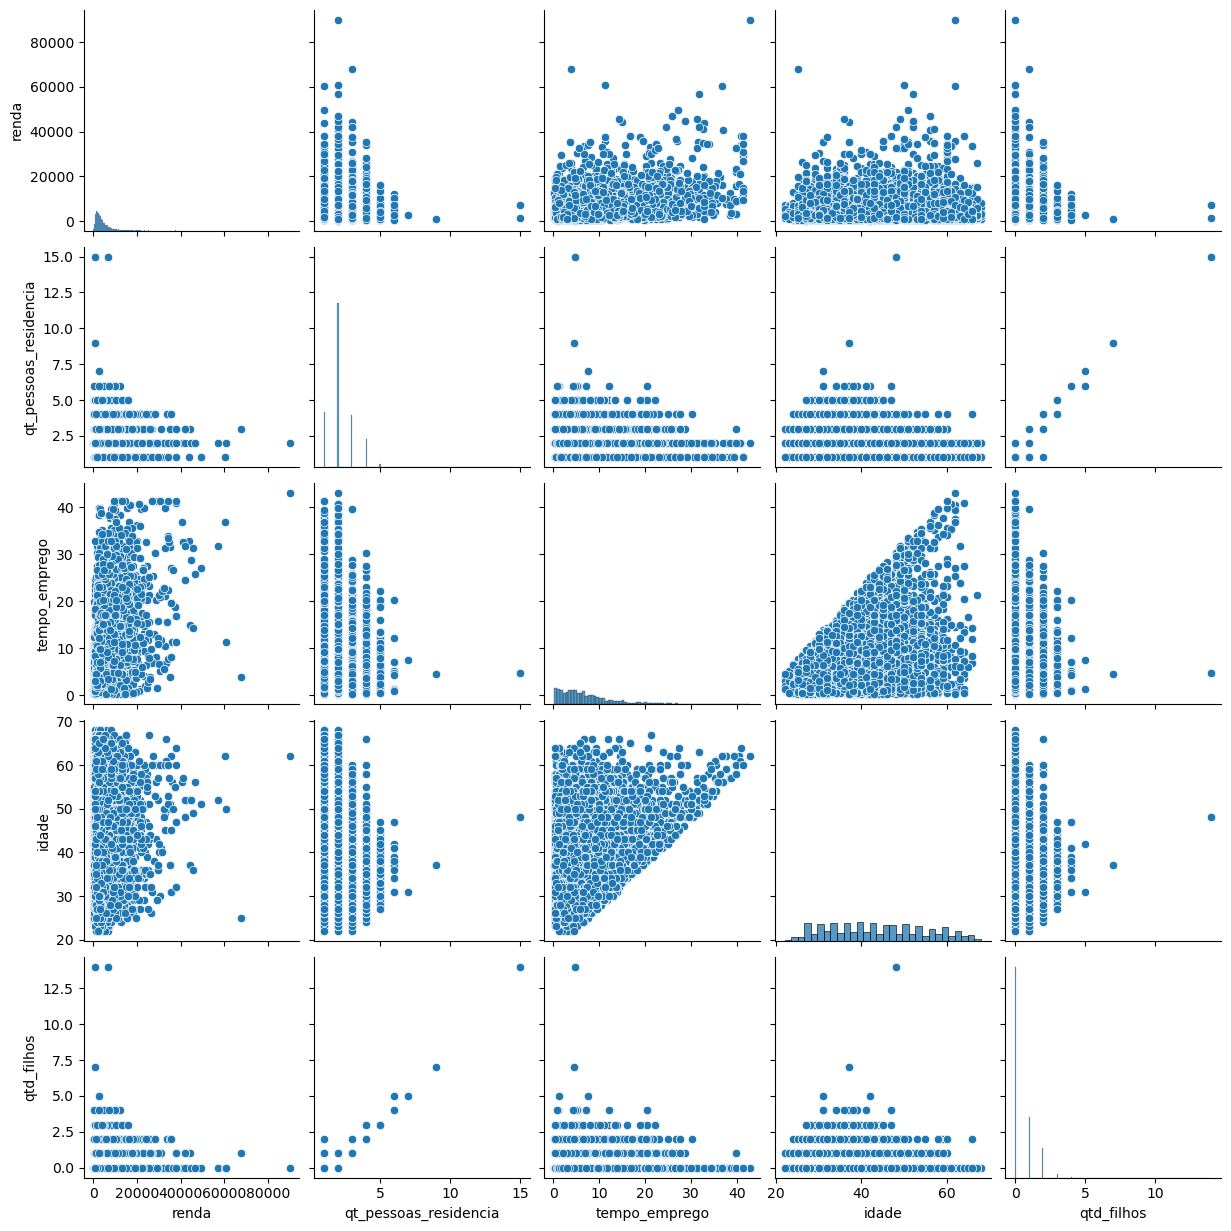

In [5]:
# Gerando um grafico pairplot, Matriz de Dispersão
sns.pairplot(prev_renda_quant)

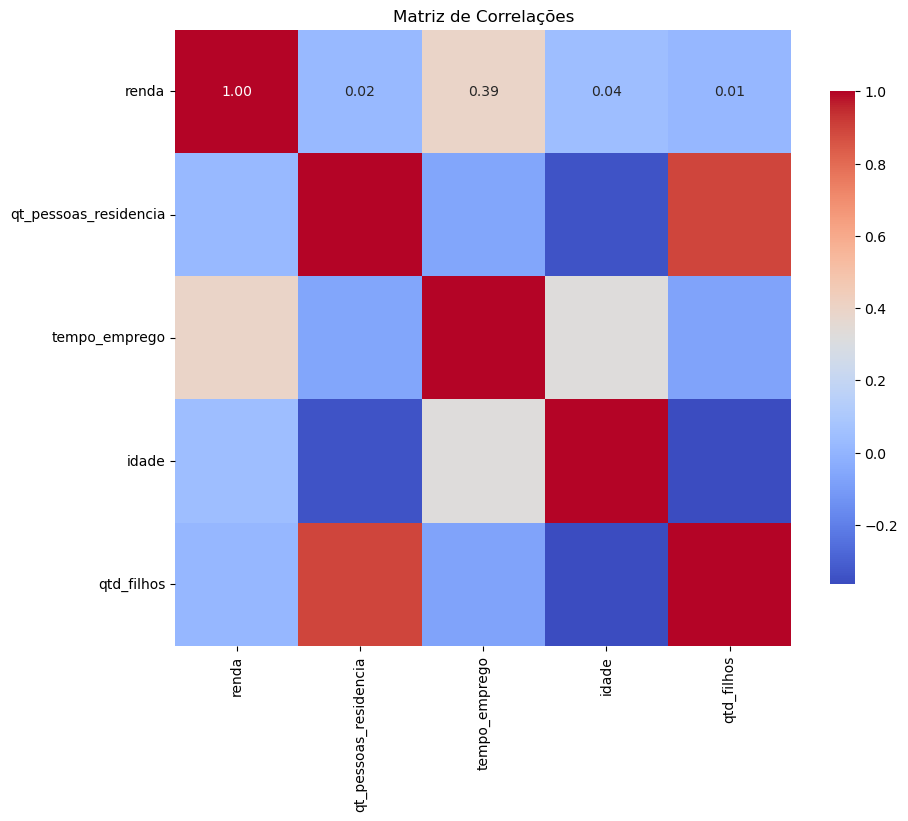

In [6]:
# 2. Matriz de Correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlações')
plt.show()

-  Observamos com a Matriz de correlação entre a renda e o tempo de emprego, tempo de emprego e idade. Mostrando que a variavel tempo de emprego e importe na nossa analise.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

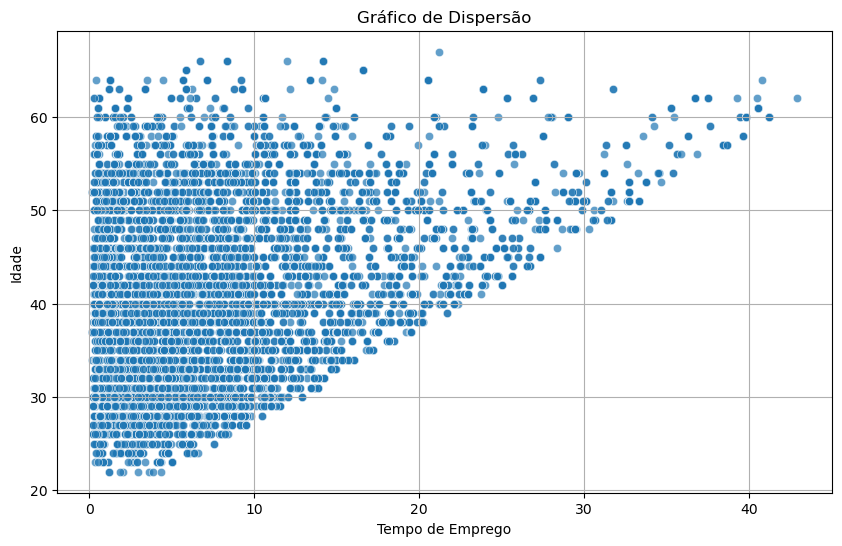

In [7]:
# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data= prev_renda_quant, x='tempo_emprego', y='idade', alpha=0.7)
plt.title('Gráfico de Dispersão')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Idade')
plt.grid()

In [8]:
# 1. Calcular a correlação
correlation = prev_renda_quant['tempo_emprego'].corr(prev_renda_quant['idade'])
correlation

0.32393355017146475

-  Podemos ver que a maior parte dos clientes trabalham ate os 10 anos em uma empresa e que os que duram por mais tempo tendem a ter mais idade de 30 a 40 anos a cima.

3) Na su aopinião, há outliers na variável renda?

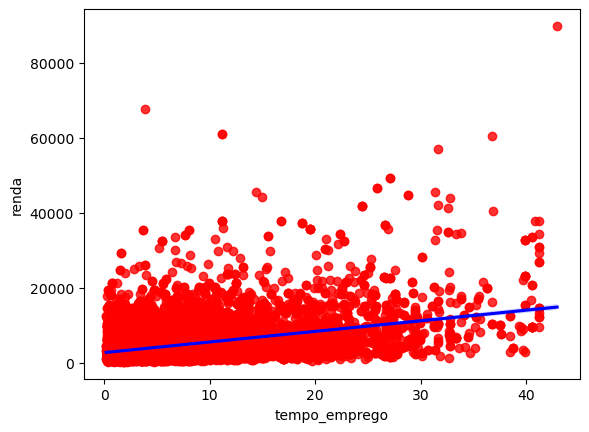

In [20]:
# Vamos observar a variavel Criando um grafico de dispersão
_ = sns.regplot(x= 'tempo_emprego', y = 'renda', data = prev_renda_quant,
                scatter_kws={'color': 'red'},
                line_kws={'color': 'blue'} )

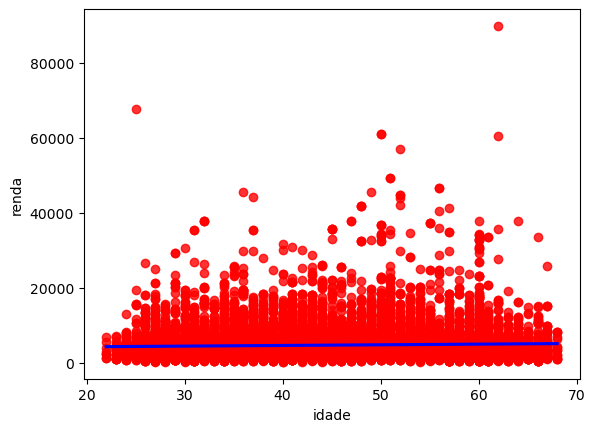

In [21]:
_ = sns.regplot(x= 'idade', y = 'renda', data = prev_renda_quant,
                scatter_kws={'color': 'red'},
                line_kws={'color': 'blue'} )

-  Podemos notar que temos outliers na variavel renda sendo que temos valores que ficam bem distantes dos outros.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

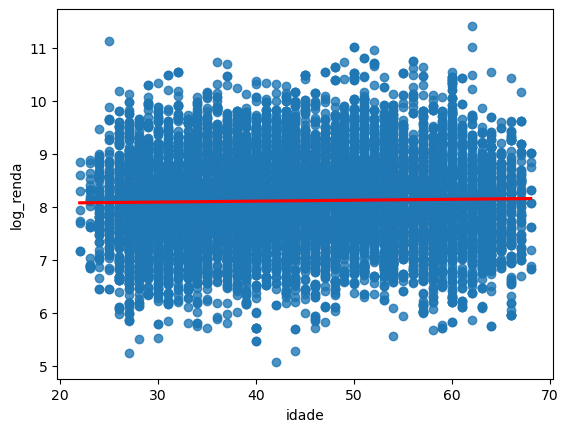

In [17]:
prev_renda_quant.loc[:, 'log_renda'] = np.log(prev_renda_quant['renda'])
_ = sns.regplot(x= 'idade', y = 'log_renda', data = prev_renda_quant,line_kws={'color': 'red'} )

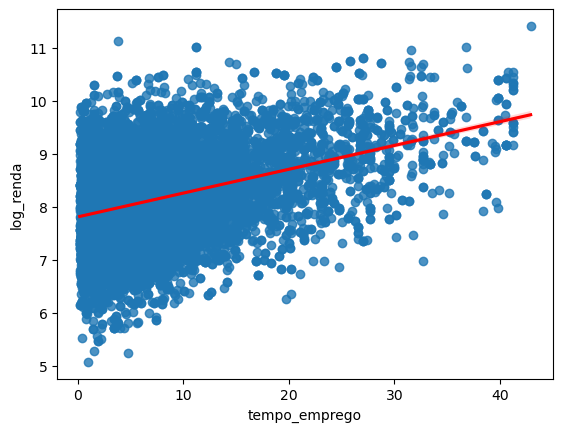

In [18]:
_ = sns.regplot(x= 'tempo_emprego', y = 'log_renda', data = prev_renda_quant, line_kws={'color': 'red'} )

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

- pelo logaritmo podemos analisar e ver que a correlação da variavel renda com as variaveis idade e tempo de emprego e vemos que a renda aumenta de acordo com o tempo de emprego.